In [1]:
from model import *
import scanpy as sc

In [2]:
# Read in the scanpy object which was saved from scRNA_practice.ipynb
save_file = '/Users/xly/Desktop/study/python/adata_combat.h5ad'
adata_combat = sc.read_h5ad(save_file)

# Use log normalzied raw data as input to VAE
# Note that as a demo, the cells are already assigned clusters in scRNA_practice.ipynb. 
# In real applications, the clusters are not known when VAE is used for dimentionality reduction
adata_pp = adata_combat.copy()
adata_pp.X = adata_combat.layers["counts"] 
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)

X = adata_pp.X
X

array([[0.       , 4.984695 , 4.984695 , ..., 0.       , 4.984695 ,
        0.       ],
       [6.540169 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [5.5964065, 0.       , 0.       , ..., 0.       , 5.5964065,
        0.       ],
       [6.0348916, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [4.9338408, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [9]:
# beta-VAE, beta = 1000
orig_dim = X.shape[1]
vae1000 = VAE(orig_dim, beta = 1000)

train_step(100, vae1000, X)

Start of epoch 0
step 0: mean loss = 76513.9453, KL loss = 20192.3262
Start of epoch 10
step 0: mean loss = 44656.3086, KL loss = 42.3661
Start of epoch 20
step 0: mean loss = 40598.6406, KL loss = 210.7413
Start of epoch 30
step 0: mean loss = 39078.8047, KL loss = 157.5999
Start of epoch 40
step 0: mean loss = 38296.4141, KL loss = 125.9764
Start of epoch 50
step 0: mean loss = 37816.7148, KL loss = 112.1684
Start of epoch 60
step 0: mean loss = 37468.5977, KL loss = 339.1801
Start of epoch 70
step 0: mean loss = 37197.7344, KL loss = 298.1409
Start of epoch 80
step 0: mean loss = 36983.5898, KL loss = 410.2952
Start of epoch 90
step 0: mean loss = 36807.5469, KL loss = 371.0488


In [3]:
# beta-VAE, beta = 100
orig_dim = X.shape[1]
vae100 = VAE(orig_dim, beta = 100)

train_step(100, vae100, X)

Start of epoch 0
step 0: mean loss = 60385.4648, KL loss = 243.2917
Start of epoch 10
step 0: mean loss = 41387.9023, KL loss = 523.9765
Start of epoch 20
step 0: mean loss = 38944.5664, KL loss = 343.3880
Start of epoch 30
step 0: mean loss = 37960.2188, KL loss = 293.3558
Start of epoch 40
step 0: mean loss = 37410.4258, KL loss = 277.5707
Start of epoch 50
step 0: mean loss = 37051.3828, KL loss = 243.2712
Start of epoch 60
step 0: mean loss = 36790.1250, KL loss = 278.1768
Start of epoch 70
step 0: mean loss = 36589.7773, KL loss = 265.7274
Start of epoch 80
step 0: mean loss = 36409.3242, KL loss = 265.9443
Start of epoch 90
step 0: mean loss = 36254.3750, KL loss = 228.0011


In [4]:
# beta-VAE, beta = 10
orig_dim = X.shape[1]
vae10 = VAE(orig_dim, beta = 10)

train_step(100, vae10, X)

Start of epoch 0
step 0: mean loss = 57728.3633, KL loss = 52.0820
Start of epoch 10
step 0: mean loss = 40078.6875, KL loss = 375.7969
Start of epoch 20
step 0: mean loss = 38398.3984, KL loss = 152.1555
Start of epoch 30
step 0: mean loss = 37741.4414, KL loss = 118.9547
Start of epoch 40
step 0: mean loss = 37312.9922, KL loss = 113.7367
Start of epoch 50
step 0: mean loss = 37001.0195, KL loss = 85.6716
Start of epoch 60
step 0: mean loss = 36772.5859, KL loss = 100.8015
Start of epoch 70
step 0: mean loss = 36581.9219, KL loss = 76.4611
Start of epoch 80
step 0: mean loss = 36428.5312, KL loss = 71.8782
Start of epoch 90
step 0: mean loss = 36298.9219, KL loss = 57.9446


In [5]:
# beta-VAE, beta = 1
orig_dim = X.shape[1]
vae1 = VAE(orig_dim, beta = 1)

train_step(100, vae1, X)

Start of epoch 0
step 0: mean loss = 60370.9688, KL loss = 74.9330
Start of epoch 10
step 0: mean loss = 40138.0547, KL loss = 225.6057
Start of epoch 20
step 0: mean loss = 37965.2031, KL loss = 115.4091
Start of epoch 30
step 0: mean loss = 37104.3984, KL loss = 93.7038
Start of epoch 40
step 0: mean loss = 36607.5781, KL loss = 75.1410
Start of epoch 50
step 0: mean loss = 36269.5742, KL loss = 55.5249
Start of epoch 60
step 0: mean loss = 36023.4609, KL loss = 46.0625
Start of epoch 70
step 0: mean loss = 35835.8281, KL loss = 41.2472
Start of epoch 80
step 0: mean loss = 35683.3711, KL loss = 34.3863
Start of epoch 90
step 0: mean loss = 35552.5000, KL loss = 35.0837


In [12]:
# plot function
def plot_latent(latent_layer):
    latent = latent_layer([X])

    x_encoded = np.array(latent[0][0][2])

    le = preprocessing.LabelEncoder()

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, obs in zip([0, 1, 2], ['region', 'sample', 'louvain_r0.65']):
        le.fit(list(adata_combat.obs[obs]))
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

        color = le.transform(adata_combat.obs[obs])    
        im = axes[i].scatter(x_encoded[:, 0], x_encoded[:, 1], c=color, marker='o', s=10)
        axes[i].set_xlabel('z [0]', fontsize='16')
        axes[i].set_ylabel('z [1]', fontsize='16')
        axes[i].set_title(obs, fontsize='16')
        cb = plt.colorbar(im, ax=axes[i])
        loc = np.arange(max(color) + 1)
        cb.set_ticks(loc)
        cb.set_ticklabels(list(le_name_mapping.keys()))

beta=1000


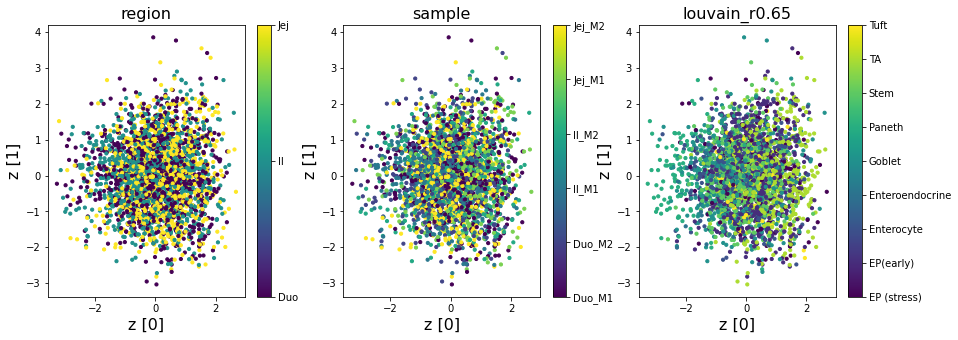

In [14]:
# without the following 2 lines, error can occur
inputs = tf.keras.Input(shape=X.shape)
vae1000.call(inputs)

layer_names=[layer.name for layer in vae1000.layers]
latent_layer = K.function(inputs=[vae1000.layers[0].input], 
                          outputs=[vae1000.get_layer(layer_names[0]).output])
print("beta=1000")
plot_latent(latent_layer)

beta=100


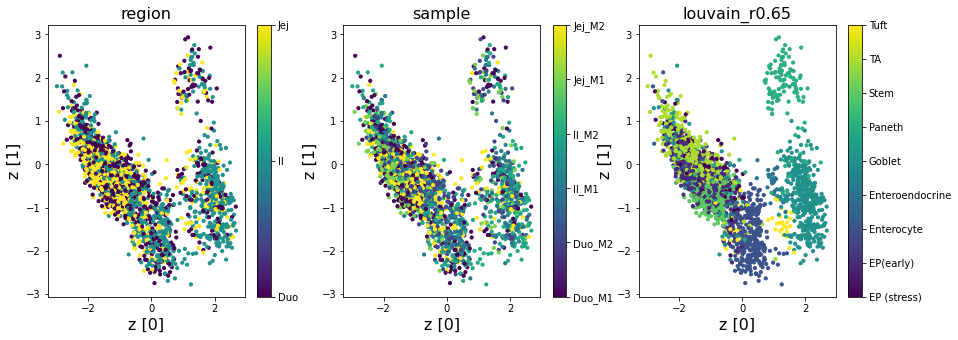

In [15]:
vae100.call(inputs)

layer_names=[layer.name for layer in vae100.layers]
latent_layer = K.function(inputs=[vae100.layers[0].input], 
                          outputs=[vae100.get_layer(layer_names[0]).output])
print("beta=100")
plot_latent(latent_layer)

beta=10


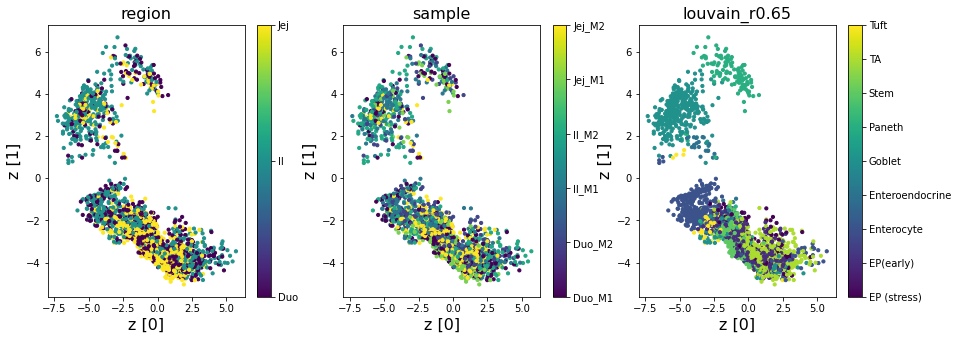

In [16]:
vae10.call(inputs)

layer_names=[layer.name for layer in vae10.layers]
latent_layer = K.function(inputs=[vae10.layers[0].input], 
                          outputs=[vae10.get_layer(layer_names[0]).output])
print("beta=10")
plot_latent(latent_layer)

beta=1


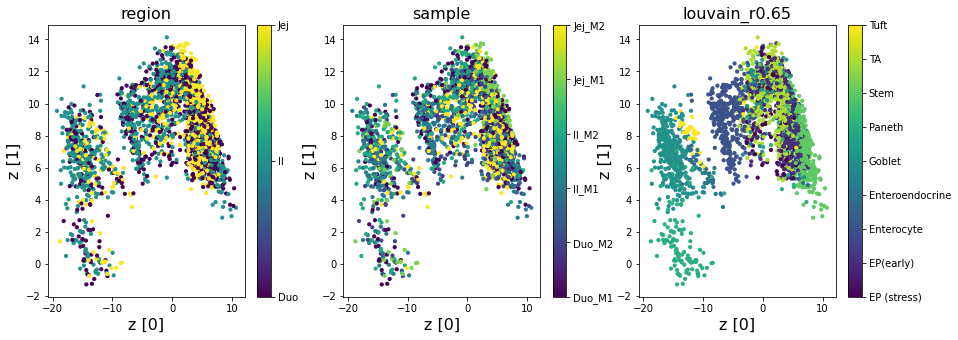

In [17]:
vae1.call(inputs)

layer_names=[layer.name for layer in vae1.layers]
latent_layer = K.function(inputs=[vae1.layers[0].input], 
                          outputs=[vae1.get_layer(layer_names[0]).output])
print("beta=1")
plot_latent(latent_layer)

When beta is larger (e.g. 1000), KL loss plays a larger role in total loss and limits the representation capacity of latent space features, so all the clusters are mixed in the latent space. When beta is smaller, different clusters are more separated.